In [1]:
import os
os.getcwd()

'/home/fernando/GoogleDrive/ds4a/products/code_and_notebooks/dockerKJ/notebooks'

In [2]:
from wordcloud import WordCloud
import pandas as pd
import re
import matplotlib.pyplot as plt

from nltk import word_tokenize 
from nltk.util import ngrams
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


stop_spanish = stopwords.words('spanish')
#print(sorted(stop_spanish))
keep=["no","sin","ni","poco","muy","mucho","muchos","contra","más"]
new_stop = [stop_spanish for stop_spanish in stop_spanish if stop_spanish not in keep]



In [4]:
print(sorted(new_stop))

['a', 'al', 'algo', 'algunas', 'algunos', 'ante', 'antes', 'como', 'con', 'cual', 'cuando', 'de', 'del', 'desde', 'donde', 'durante', 'e', 'el', 'ella', 'ellas', 'ellos', 'en', 'entre', 'era', 'erais', 'eran', 'eras', 'eres', 'es', 'esa', 'esas', 'ese', 'eso', 'esos', 'esta', 'estaba', 'estabais', 'estaban', 'estabas', 'estad', 'estada', 'estadas', 'estado', 'estados', 'estamos', 'estando', 'estar', 'estaremos', 'estará', 'estarán', 'estarás', 'estaré', 'estaréis', 'estaría', 'estaríais', 'estaríamos', 'estarían', 'estarías', 'estas', 'este', 'estemos', 'esto', 'estos', 'estoy', 'estuve', 'estuviera', 'estuvierais', 'estuvieran', 'estuvieras', 'estuvieron', 'estuviese', 'estuvieseis', 'estuviesen', 'estuvieses', 'estuvimos', 'estuviste', 'estuvisteis', 'estuviéramos', 'estuviésemos', 'estuvo', 'está', 'estábamos', 'estáis', 'están', 'estás', 'esté', 'estéis', 'estén', 'estés', 'fue', 'fuera', 'fuerais', 'fueran', 'fueras', 'fueron', 'fuese', 'fueseis', 'fuesen', 'fueses', 'fui', 'fuimo

In [ ]:
col_df = pd.read_csv('../datasets/1. Colombia_feedback_consolidado_raw.csv' ,dtype= {"idea":"object"})
cash_df = col_df[col_df.service_type == 'Cash Transfer'][['idea']].head(1000)
text = cash_df["idea"]

In [6]:
list2 = ["través"]
new_stop.extend(list2)
print(new_stop)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'una', 'su', 'al', 'lo', 'como', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'quienes', 'nada', 'cual', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'esté', 'estés', 'estemos', 'estéis', 'estén', 'estaré', 'estarás', 'est

In [8]:
series = "text.csv"
text = pd.read_csv(series, squeeze = True, nrows=500)#header = None,


In [9]:
#text.to_csv("text.csv",index=False)
text

0      Los servicios están bien pero desearía más inf...
1      La asesoría es muy buena, pero  desearía que i...
2      El servicio es excelente pero quisiera más ape...
3      Desearía tener más talleres para aprender a ma...
4      Me gustaría un espacio más amplio por qué el s...
                             ...                        
495    Muchos migrantes necesitamos esta ayuda y quie...
496    Lo que más me gustó fue la organización que ma...
497    Se deberían orientar más hacia los niños otorg...
498    Vivo en patio bonito y el transporte se me com...
499    La atención es buena,deseo talleres motivacion...
Name: idea, Length: 500, dtype: object

In [5]:
big_list=[]
for line in text:
    word_tokens = word_tokenize(line)
    filtered_sentence = []

    for w in word_tokens:
        if w not in new_stop:
            filtered_sentence.append(w)
            
    filtered_sentence = [' '.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in filtered_sentence]
    filtered_sentence = " ".join(filtered_sentence)
    token = word_tokenize(filtered_sentence)
    
    bigram = list(ngrams(token, 3))
    big_list.append(bigram)

flat_list = [item for sublist in big_list for item in sublist]
dictionary2 = [' '.join(tup) for tup in flat_list]

In [6]:
dictionary2

[]

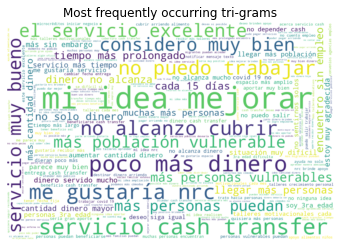

In [14]:
#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
bag_of_words = vectorizer.fit_transform(dictionary2)
#vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
pd.DataFrame(words_freq).to_csv("file.csv", index=False)

#Generating wordcloud and saving as jpg image
words_dict = dict(words_freq)
WC_height = 1000
WC_width = 1500
WC_max_words = 200
wordCloud = WordCloud(background_color='white',max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=new_stop)
wordCloud.generate_from_frequencies(words_dict)
plt.title('Most frequently occurring tri-grams')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#wordCloud.to_file('wordcloud_trigram.jpg')
